# MLR_50_Startups

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as st

In [ ]:
upload=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [ ]:
data.corr()

<ipython-input-4-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data=pd.get_dummies(data,columns=['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## Visualization

<Axes: >

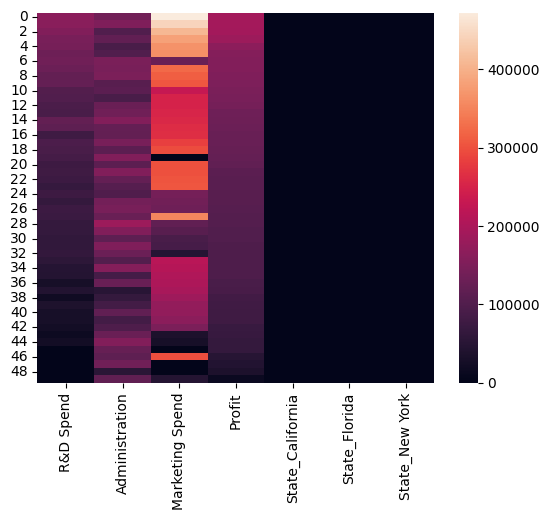

In [ ]:
sns.heatmap(data=data)

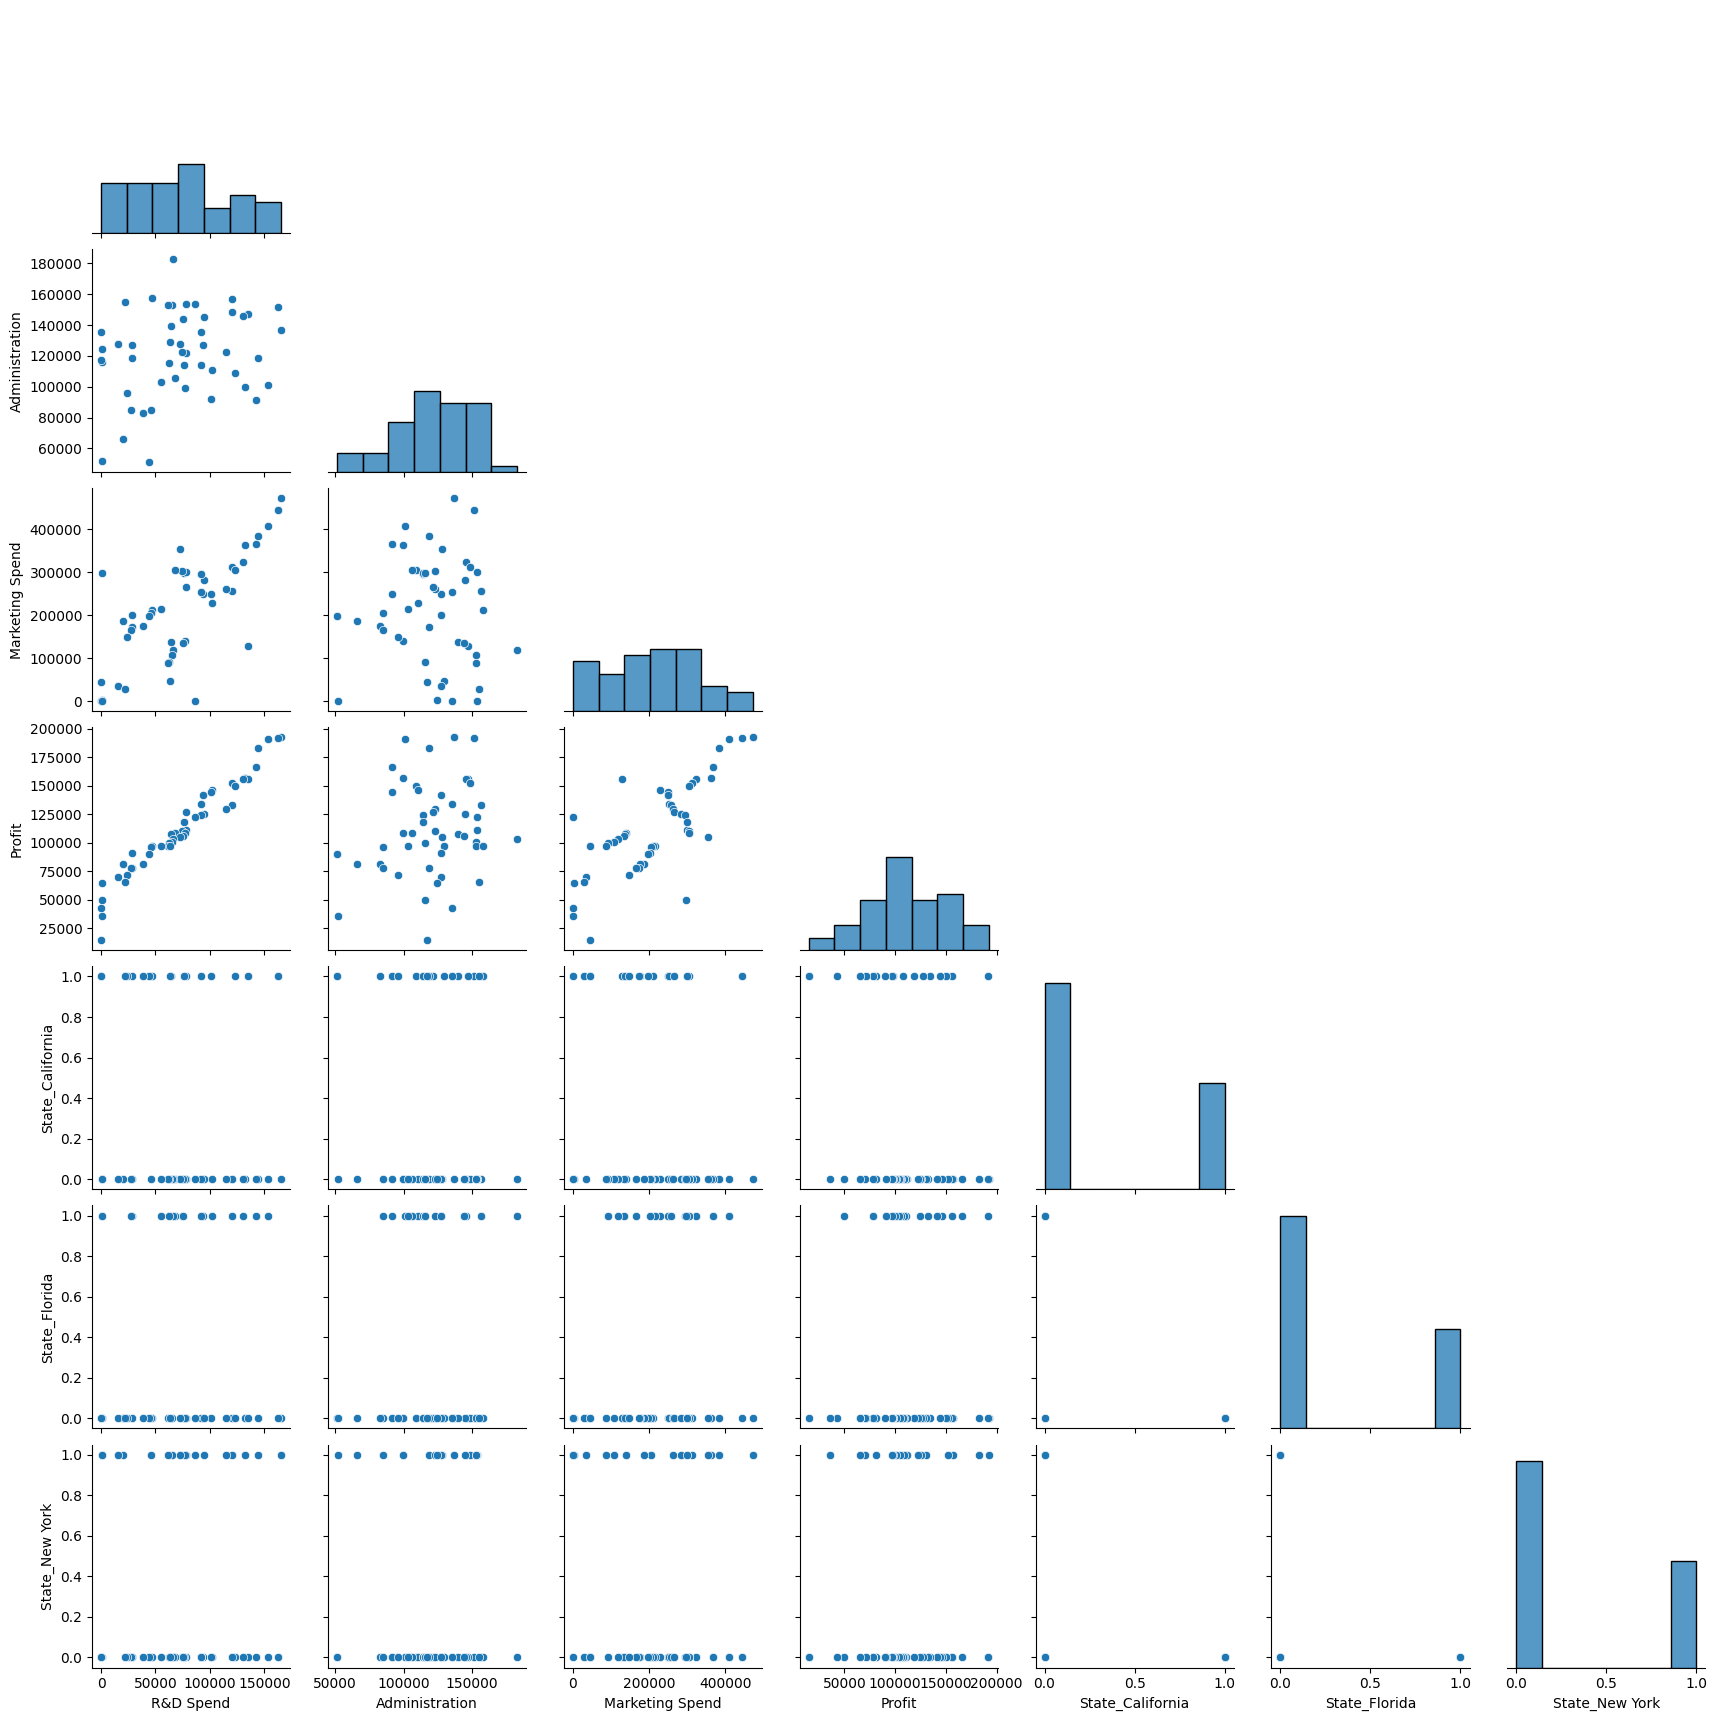

In [ ]:
sns.pairplot(data = data, corner = True)

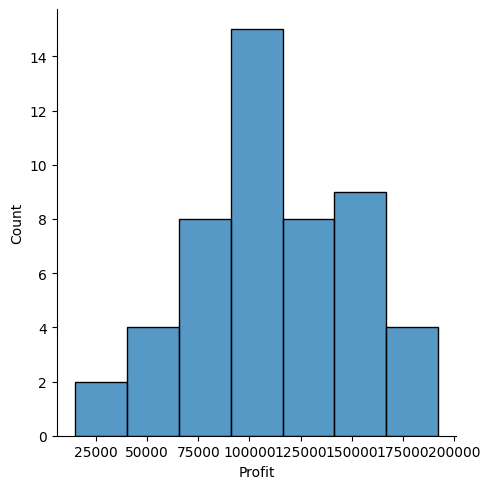

In [ ]:
sns.displot(data['Profit'])

## Split x and y

In [ ]:
X=data.iloc[:,[0,1,2,4,5,6]]
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [ ]:
Y=data.iloc[:,3]
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Train_Test_Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200)

In [ ]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
5,131876.90,99814.71,362861.36,0,0,1
2,153441.51,101145.55,407934.54,0,1,0
46,1315.46,115816.21,297114.46,0,1,0
30,61994.48,115641.28,91131.24,0,1,0
34,46426.07,157693.92,210797.67,1,0,0


In [ ]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
31,61136.38,152701.92,88218.23,0,0,1
28,66051.52,182645.56,118148.20,0,1,0
20,76253.86,113867.30,298664.47,1,0,0


## Model fitting

In [ ]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
lreg_pred_ytrain=lreg.predict(x_train)

# Generate Prediction on test set
lreg_pred_ytest = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_pred_ytest - y_test)**2)
print("Mean square error on test data is : ", mean_squared_error)

Mean square error on test data is :  154062171.28878224


In [ ]:
# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
lreg_coefficient

,Columns,Coefficient Estimate
0,R&D Spend,0.783747
1,Administration,-0.016394
2,Marketing Spend,0.024145
3,State_California,1261.331311
4,State_Florida,-308.327264
5,State_New York,-953.004047


Text(0.5, 1.0, 'Coefficient Estimates ')

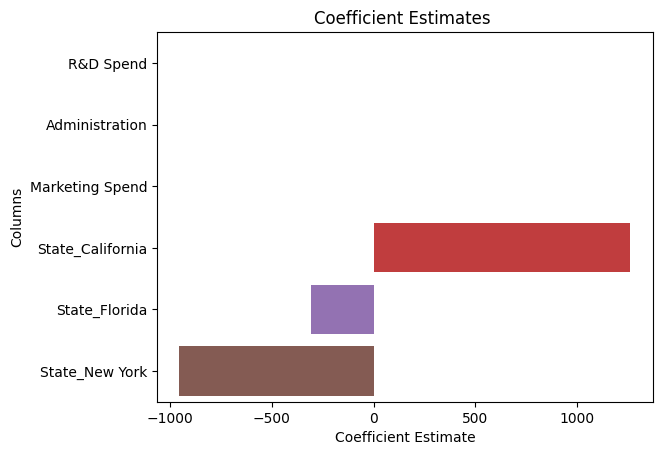

In [ ]:
sns.barplot(x='Coefficient Estimate',y='Columns',data=lreg_coefficient,orient='h')
plt.title("Coefficient Estimates ")

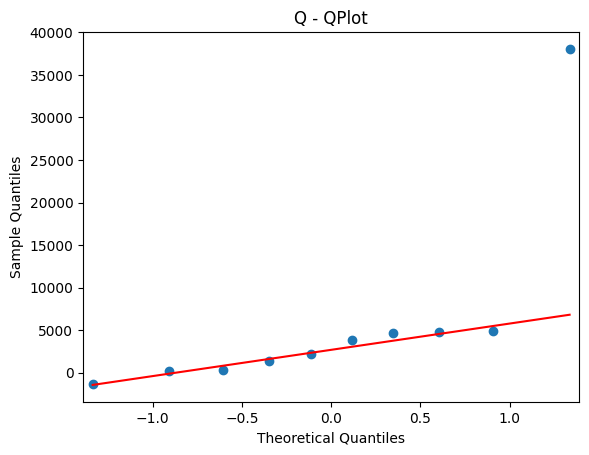

In [ ]:
res = lreg_pred_ytest - y_test
fig = sm.qqplot(data=res, line="q")
plt.title("Q - QPlot")
plt.show()

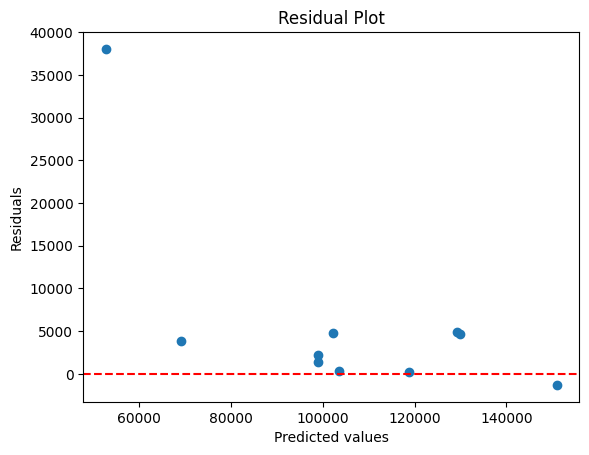

In [ ]:
plt.scatter(lreg_pred_ytest, res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Accuracy

In [ ]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,lreg_pred_ytrain)
r2_test=r2_score(y_test,lreg_pred_ytest)
(r2_train,r2_test)

(0.960024485294055, 0.8798449716509686)